# Доверительные интервалы для доли 

## Генерация данных

In [6]:
import numpy as np

In [7]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [8]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [28]:
random_sample.mean()

0.49177426072469804

## Доверительный интервал для доли

In [29]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [30]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [31]:
print('normal_interval [{}, {}] with width {}'.format(normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.4817757977994866, 0.5017727236499095] with width 0.019996925850422953


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [32]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [33]:
print('wilson_interval [{}, {}] with width {}'.format(wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.4817810851371938, 0.5017740140307944] with width 0.019992928893600548


## Размер выборки для интервала заданной ширины

In [34]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [42]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9602

In [43]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [44]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [45]:
print('normal_interval [{}, {}] with width {}'.format(normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.4818771546946043, 0.5018762300169142] with width 0.01999907532230988


# Задание

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [69]:
maya_sample = [0 for i in range(49)] + [1]

In [70]:
normal_interval = proportion_confint(sum(maya_sample), len(maya_sample), method = 'normal')

In [71]:
print('normal_interval [{}, {}] with width {}'.format(normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.0, 0.05880530708179099] with width 0.05880530708179099


In [72]:
wilson_interval = proportion_confint(sum(maya_sample), len(maya_sample), method = 'wilson')

In [73]:
print('wilson_interval [{}, {}] with width {}'.format(wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.003539259271646236, 0.10495443589637815] with width 0.10141517662473191


In [75]:
n_samples = int(np.ceil(samplesize_confint_proportion(np.mean(maya_sample), 0.01)))
n_samples

753

In [112]:
x = [0.1, 0.2, 0.3, 0.4, 0.49, 0.5, 0.51, 0.6, 0.7, 0.8, 0.9, 1]
y = [int(np.ceil(samplesize_confint_proportion(i, 0.01))) for i in x]
y

[3458, 6147, 8068, 9220, 9600, 9604, 9600, 9220, 8068, 6147, 3458, 0]

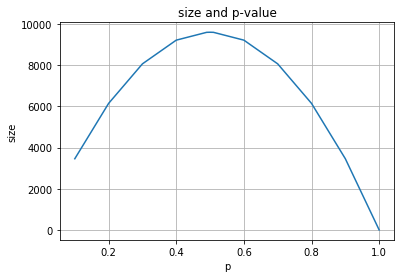

In [113]:
import matplotlib
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='p', ylabel='size',
       title='size and p-value')
ax.grid()

plt.show()

In [109]:
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import norm
proportion_confint(1, 50, method = 'normal')

(0.0, 0.05880530708179099)

In [110]:
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [111]:
my_proportion_confint(1, 50, method = 'normal')

(-0.018805307081790987, 0.05880530708179099)